# 유니콘 기업 연매출액 및 유니콘 등재년도 분석
- 국내 유니콘 기업으로 등재된 쿠팡, 크래프톤, 옐로모바일, 비바리퍼블리카, 위메프, 무신사, 지피클럽, 엘앤피코스메틱, 에이프로젠, 야놀자, 쏘카 11개사 대상

In [2]:
# 필요 라이브러리 호출 및 세팅
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rc("font",family = "Malgun Gothic")
plt.rc("axes",unicode_minus = False)
pd.options.display.float_format = '{:20,.0f}'.format

In [3]:
# 데이터셋 불러오기
# '연매출액' 단위는 천원임
# '유니콘 등재월'은 연-월 정보까지 유효하며, 날짜는 1일로 통일되어 들어가 있음
df = pd.read_excel('unicorns_full.xlsx')
df

,회사ID,연매출액,년도,유니콘 등재월
0,쿠팡,47799834,2013,2014-05-01
1,쿠팡,348497429,2014,2014-05-01
2,쿠팡,1133752000,2015,2014-05-01
3,쿠팡,1915941000,2016,2014-05-01
4,쿠팡,2681390000,2017,2014-05-01
...,...,...,...,...
64,쏘카,121086079,2017,2020-01-01
65,쏘카,159424490,2018,2020-01-01
66,쏘카,256671600,2019,2020-01-01
67,쏘카,256671600,2019,2020-01-01


In [4]:
# 년도 컬럼 category 타입으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   회사ID     69 non-null     object        
 1   연매출액     69 non-null     int64         
 2   년도       69 non-null     int64         
 3   유니콘 등재월  69 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ KB


In [5]:
# 연매출액을 억원 단위로 표기한 컬럼 생성
df['연매출액(억원)'] = df['연매출액'] / 100000
df

,회사ID,연매출액,년도,유니콘 등재월,연매출액(억원)
0,쿠팡,47799834,2013,2014-05-01,478
1,쿠팡,348497429,2014,2014-05-01,"3,485"
2,쿠팡,1133752000,2015,2014-05-01,"11,338"
3,쿠팡,1915941000,2016,2014-05-01,"19,159"
4,쿠팡,2681390000,2017,2014-05-01,"26,814"
...,...,...,...,...,...
64,쏘카,121086079,2017,2020-01-01,"1,211"
65,쏘카,159424490,2018,2020-01-01,"1,594"
66,쏘카,256671600,2019,2020-01-01,"2,567"
67,쏘카,256671600,2019,2020-01-01,"2,567"


In [6]:
# 연매출액 증가율 컬럼생성
df['매출액_증가율'] = df.sort_values(by = ['회사ID','년도']).groupby('회사ID')['연매출액(억원)'].pct_change()*100
df

,회사ID,연매출액,년도,유니콘 등재월,연매출액(억원),매출액_증가율
0,쿠팡,47799834,2013,2014-05-01,478,nan
1,쿠팡,348497429,2014,2014-05-01,"3,485",629
2,쿠팡,1133752000,2015,2014-05-01,"11,338",225
3,쿠팡,1915941000,2016,2014-05-01,"19,159",69
4,쿠팡,2681390000,2017,2014-05-01,"26,814",40
...,...,...,...,...,...,...
64,쏘카,121086079,2017,2020-01-01,"1,211",37
65,쏘카,159424490,2018,2020-01-01,"1,594",32
66,쏘카,256671600,2019,2020-01-01,"2,567",61
67,쏘카,256671600,2019,2020-01-01,"2,567",0


In [7]:
company_list = df['회사ID'].unique().tolist()
company_list

['쿠팡',
 '크래프톤',
 '옐로모바일',
 '비바리퍼블리카',
 '위메프',
 '무신사',
 '지피클럽',
 '엘앤피코스메틱',
 '에이프로젠',
 '야놀자',
 '쏘카']

In [8]:
unicorn_list = df.groupby('회사ID')['유니콘 등재월'].agg(min).dt.year.reset_index()
unicorn_list

,회사ID,유니콘 등재월
0,무신사,2019
1,비바리퍼블리카,2018
2,쏘카,2020
3,야놀자,2019
4,에이프로젠,2019
5,엘앤피코스메틱,2016
6,옐로모바일,2014
7,위메프,2015
8,지피클럽,2018
9,쿠팡,2014


In [9]:
xcoords = dict(unicorn_list.values)
xcoords

{'무신사': 2019,
 '비바리퍼블리카': 2018,
 '쏘카': 2020,
 '야놀자': 2019,
 '에이프로젠': 2019,
 '엘앤피코스메틱': 2016,
 '옐로모바일': 2014,
 '위메프': 2015,
 '지피클럽': 2018,
 '쿠팡': 2014,
 '크래프톤': 2018}

## 연매출액
- 에이프로젠, 옐로모바일(데이터없음)을 제외한 기업들은 유니콘 등재시점에 매출액이 상승세였음

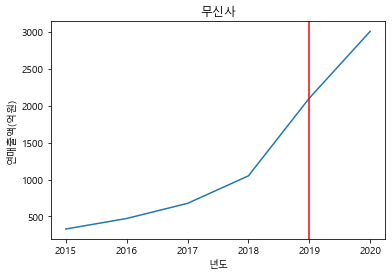

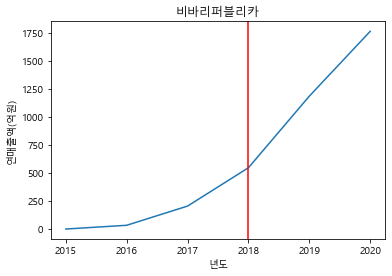

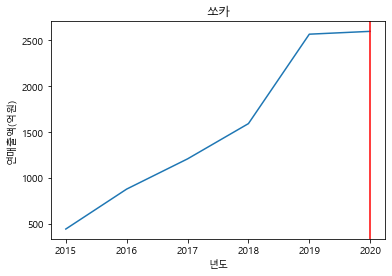

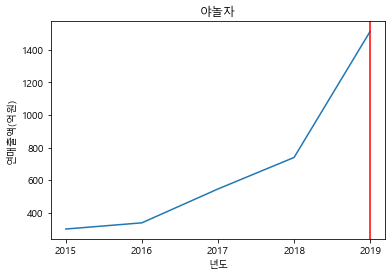

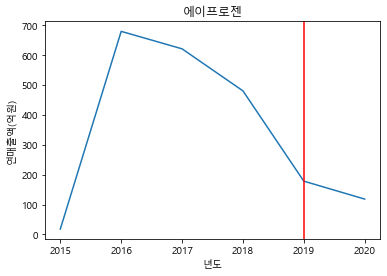

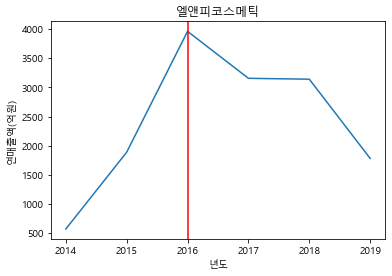

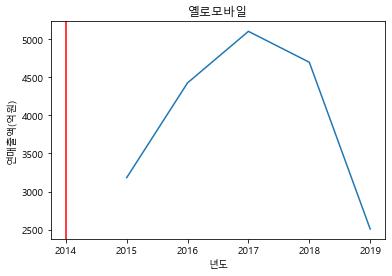

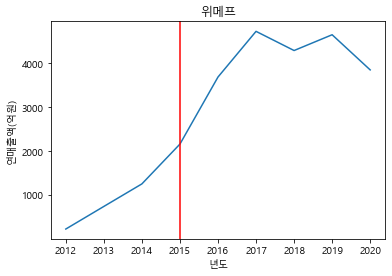

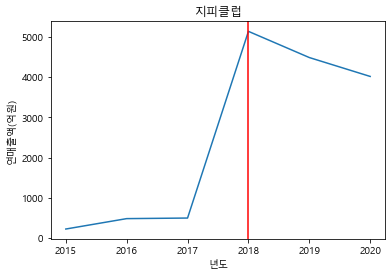

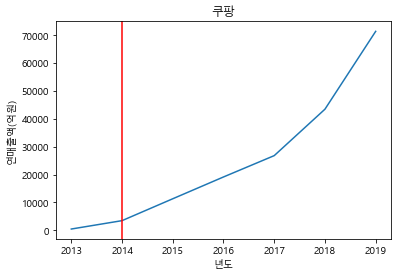

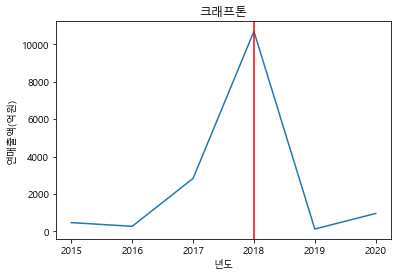

In [10]:
# 연매출액 및 유니콘 등재년도
for company, year in xcoords.items():
    df_g = df.copy()
    df_g = df_g[df_g['회사ID'] == company]
    
    # 매출액 변화 그래프 그리기
    plt.figure(figsize = (6,4))        
    plt.plot(df_g['년도'], df_g['연매출액(억원)'], label='연매출액(억원)')
    plt.title(f"{company}")
    plt.xlabel('년도')
    plt.ylabel('연매출액(억원)')
    plt.locator_params(integer=True)
    
    # 유니콘 등재년도 세로줄로 표시
    plt.axvline(x=year, color = 'r')
  
    plt.show()

## 연매출액 증가율
- 무신사, 야놀자, 지피클럽은 유니콘 등재시점에 전년대비 매출액 증가율이 월등히 높았음

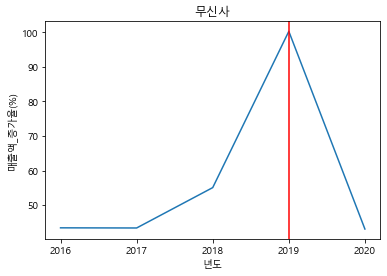

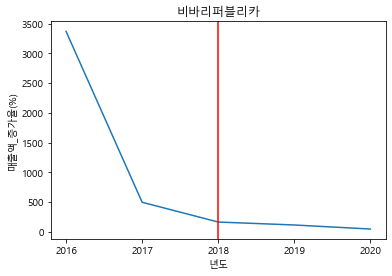

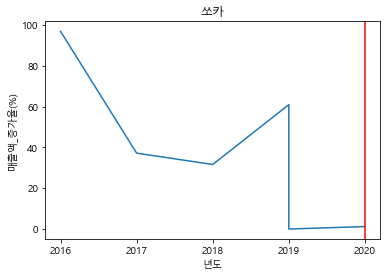

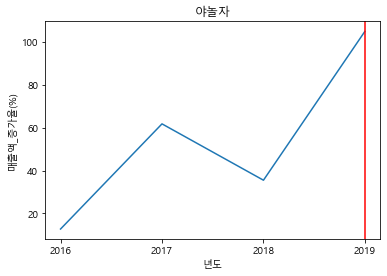

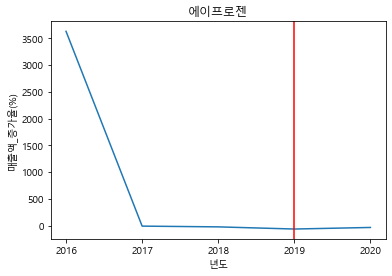

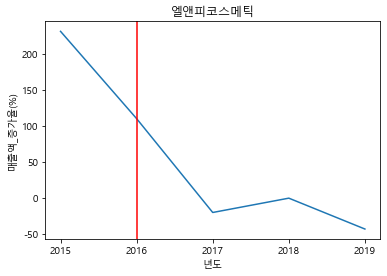

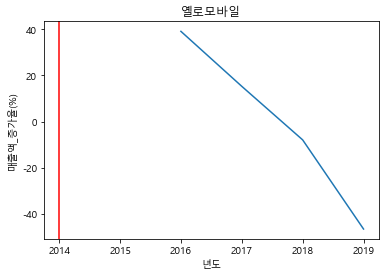

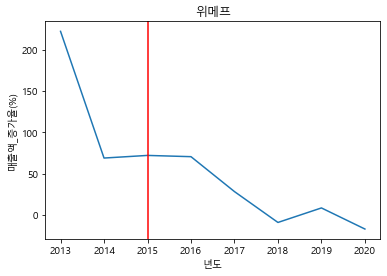

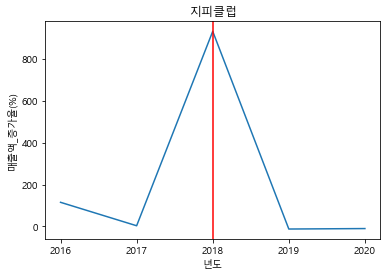

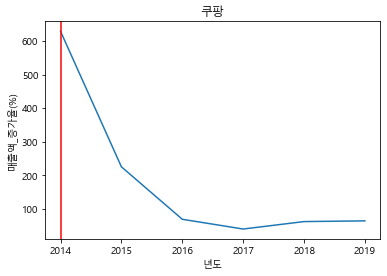

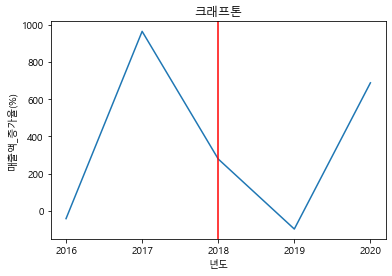

In [11]:
# 연매출액 증가율 변화 및 유니콘 등재년도
for company, year in xcoords.items():
    df_g = df.copy()
    df_g = df_g[df_g['회사ID'] == company]
    
    # 매출액 변화 그래프 그리기
    plt.figure(figsize = (6,4))        
    plt.plot(df_g['년도'], df_g['매출액_증가율'], label='매출액_증가율')
    plt.title(f"{company}")
    plt.xlabel('년도')
    plt.ylabel('매출액_증가율(%)')
    plt.locator_params(integer=True)
    
    # 유니콘 등재년도 세로줄로 표시
    plt.axvline(x=year, color = 'r')
  
    plt.show()

In [12]:
jupyter nbconvert Hello,_Colaboratory.ipynb --to slides --post serve

SyntaxError: invalid syntax (<ipython-input-12-d47e2b5b6dc9>, line 1)